# Exploratory Data Analysis on Titanic Dataset

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from matplotlib import style
from pandas_profiling import ProfileReport

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
passengers = pd.read_csv("titanic_dataset.csv")

In [5]:
passengers.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
passengers.nunique()
#418 unique passengers

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
passengers[passengers['Survived']==1][0:5] #Those who have survived, only first 5

PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [8]:
(passengers['Survived']==1).sum() #total 152 survived

342

In [9]:
#those who have survived, belongs to which classes?
survived = passengers[passengers['Survived']==1]

In [10]:
survived['Pclass'].value_counts().keys()

Int64Index([1, 3, 2], dtype='int64')

In [11]:
survived['Pclass'].value_counts().values

array([136, 119,  87])

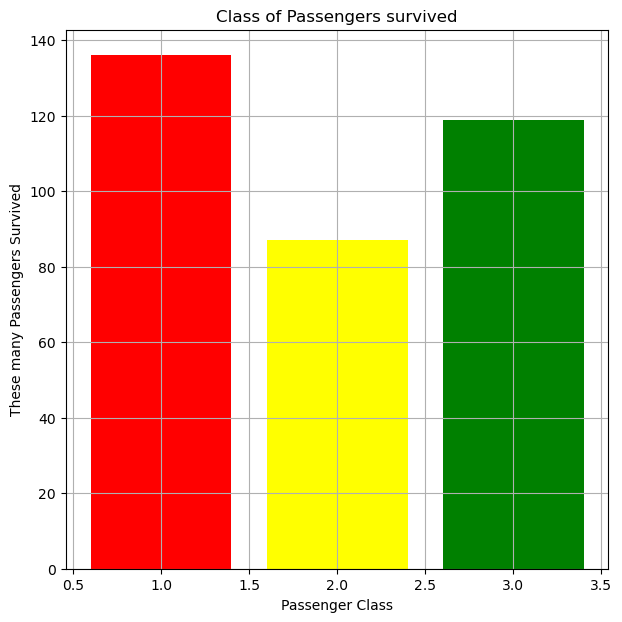

In [12]:
#Class of Passengers survived
plt.figure(figsize=(7,7))
plt.xlabel('Passenger Class')
plt.ylabel('These many Passengers Survived')
plt.yticks()
plt.grid()
plt.title('Class of Passengers survived')
plt.bar(survived['Pclass'].value_counts().keys(),survived['Pclass'].value_counts().values,color=['red','green','yellow'])
plt.show()

In [13]:
(passengers['Sex']=='female').sum() #Total 152 females in a ship

314

In [14]:
(survived['Sex']=='female').sum() and (passengers['Survived']==1).sum()

342

In [15]:
(survived['Sex']=='male').sum() and (passengers['Survived']==1).sum()
#No male survived!

342

In [16]:
passengers[['Name','Age']]

Name   Age
0                              Braund, Mr. Owen Harris  22.0
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                               Heikkinen, Miss. Laina  26.0
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                             Allen, Mr. William Henry  35.0
..                                                 ...   ...
886                              Montvila, Rev. Juozas  27.0
887                       Graham, Miss. Margaret Edith  19.0
888           Johnston, Miss. Catherine Helen "Carrie"   NaN
889                              Behr, Mr. Karl Howell  26.0
890                                Dooley, Mr. Patrick  32.0

[891 rows x 2 columns]

In [17]:
(passengers['Age'] <18).sum()

113

In [18]:
passengers[passengers['PassengerId'] == 940]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [19]:
#Categorize based on age group
# 0-17 - Children
# 18-39 - Youth
# 40-59 - MiddleAged
# 60+ - SeniorCitizens
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
passengers['AgeGrp'] = pd.cut(passengers['Age'], bins=bins, labels=labels)

In [20]:
passengers['AgeGrp'].value_counts().keys()

CategoricalIndex(['Youth', 'MiddleAged', 'Children', 'SeniorCitizens'], categories=['Children', 'Youth', 'MiddleAged', 'SeniorCitizens'], ordered=True, dtype='category')

In [21]:
passengers['AgeGrp'].value_counts().values

array([438, 137, 113,  26])

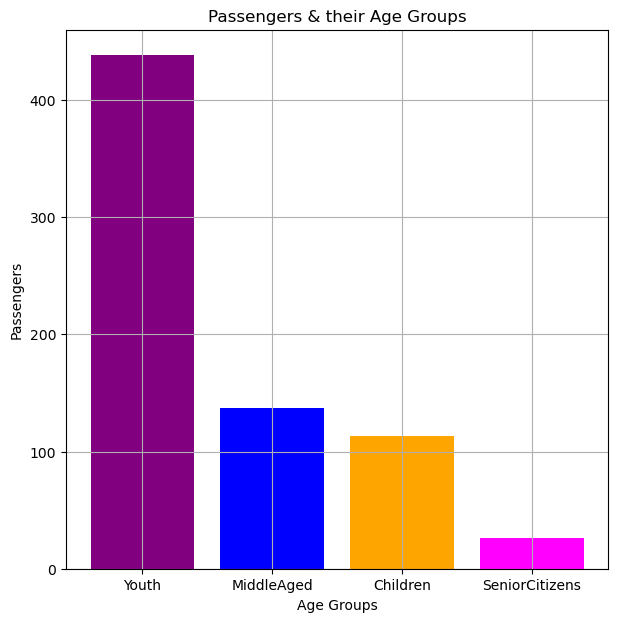

In [22]:
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Passengers')
plt.yticks()
plt.grid()
plt.title('Passengers & their Age Groups')
plt.bar(passengers['AgeGrp'].value_counts().keys(),passengers['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

In [23]:
#Categorize based on age group for survived
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)

/tmp/ipykernel_16389/643931992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)


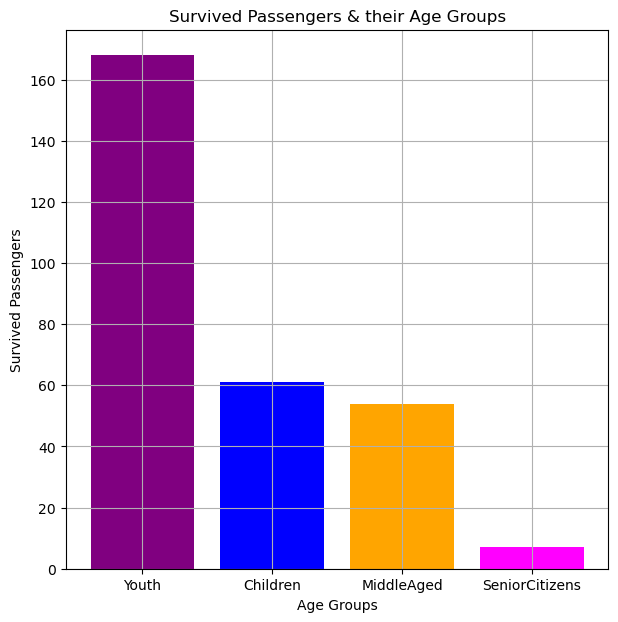

In [24]:
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.yticks()
plt.grid()
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

/tmp/ipykernel_16389/4262422822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)


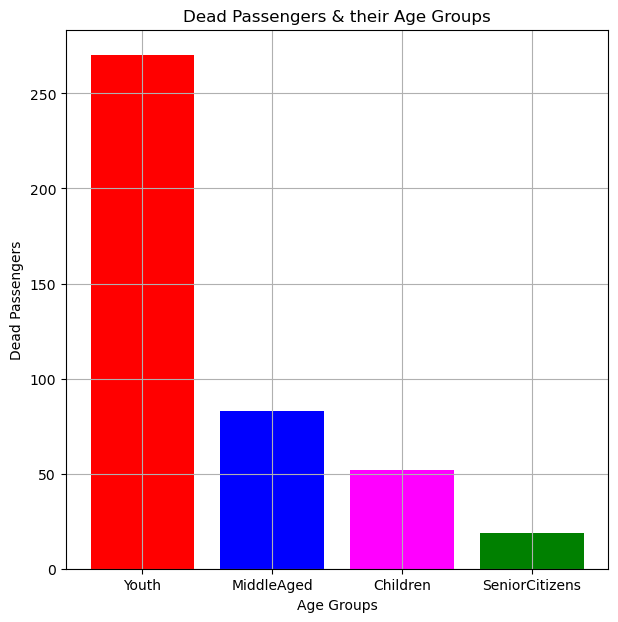

In [25]:
dead = passengers[passengers['Survived']==0]

#Categorize based on age group for dead
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)

plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.yticks()
plt.grid()
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

/tmp/ipykernel_16389/1582301643.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


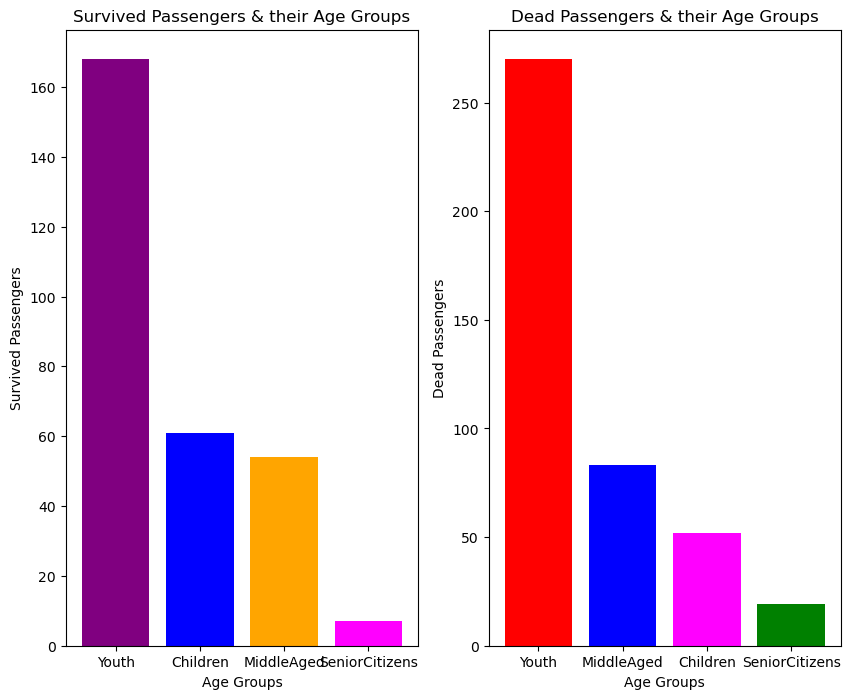

In [26]:
plt.figure(figsize=(10,8))

plt.grid()

plt.subplot(1, 2, 1)
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.subplot(1, 2, 2)
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

/tmp/ipykernel_16389/697862483.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


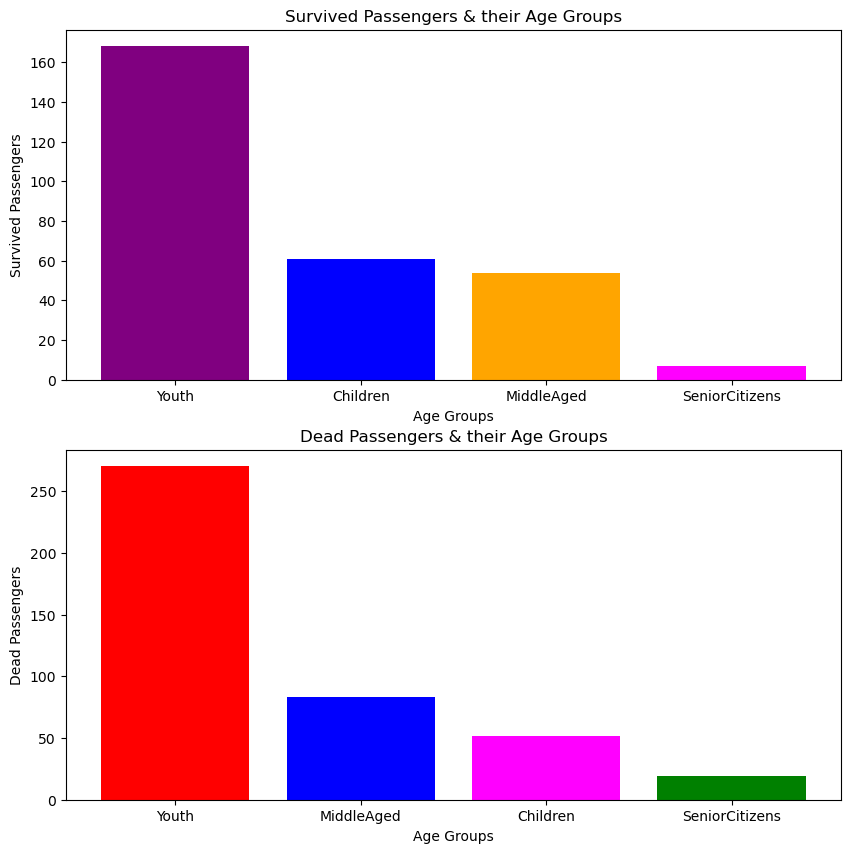

In [27]:
plt.figure(figsize=(10,10))

plt.grid()

plt.subplot(2, 1, 1)
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.subplot(2, 1, 2)
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

In [28]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


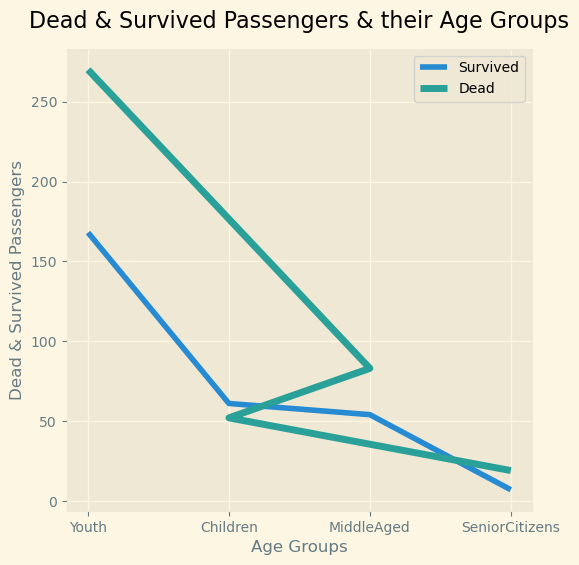

In [29]:
style.use("Solarize_Light2")
plt.figure(figsize=(6,6))
plt.plot(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(), label="Survived", linewidth=4)
plt.plot(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(), label="Dead", linewidth=5)

plt.xlabel('Age Groups')
plt.ylabel('Dead & Survived Passengers')
plt.title("Dead & Survived Passengers & their Age Groups",pad=15)
plt.legend()
#plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=8)
plt.show()

In [30]:
passengers.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeGrp  
0      0         A/5 21171   7.2500   NaN        S  Youth  
1      0          PC 17599  71.2833   C85        C  Youth  
2      0  STON/O2. 3101282   7.9250   NaN        S  Youth  
3      0            113803  53.1000  C123        S  Youth  
4      0            373450   8.0500   NaN        S  Youth

In [31]:
passengers[['Name','Cabin']]

Name Cabin
0                              Braund, Mr. Owen Harris   NaN
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   C85
2                               Heikkinen, Miss. Laina   NaN
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  C123
4                             Allen, Mr. William Henry   NaN
..                                                 ...   ...
886                              Montvila, Rev. Juozas   NaN
887                       Graham, Miss. Margaret Edith   B42
888           Johnston, Miss. Catherine Helen "Carrie"   NaN
889                              Behr, Mr. Karl Howell  C148
890                                Dooley, Mr. Patrick   NaN

[891 rows x 2 columns]

In [32]:
passengers['Cabin'].isnull().sum() # People with no Cabin

687

In [33]:
passengers['Cabin'].notnull().sum()

204

In [34]:
(passengers['Sex']=='male').sum()

577

In [35]:
((passengers['Cabin'].notnull()) & (passengers['Sex']=='male')).sum()
#So 47 males had cabin

107

In [36]:
((passengers['Cabin'].notnull()) & (passengers['Sex']=='female')).sum()
#So 44 females had cabin

97

In [37]:
passengers['Embarked'].value_counts()
# 270 Passengers mounted from Southampton
# 102 Passengers mounted from Cherbourg
# 46 Passengers mounted from Queenstown

S    644
C    168
Q     77
Name: Embarked, dtype: int64

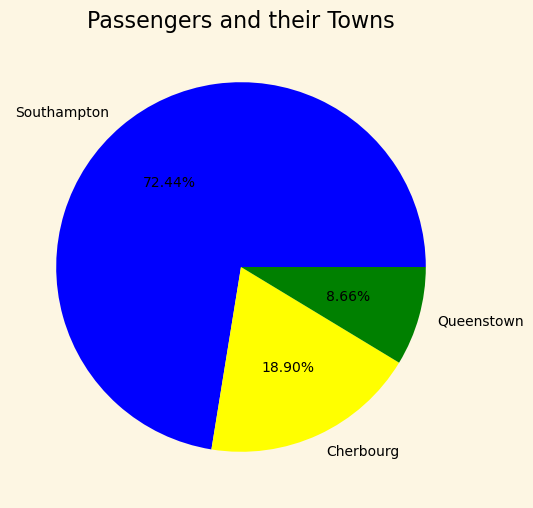

In [38]:
plt.figure(figsize=(6,6))
plt.title('Passengers and their Towns')
#shadow=True
plt.pie(passengers['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['blue','yellow','green'])
plt.show()

In [39]:
passengers[passengers['Embarked']=='S']
#Passengers from Southampton: 270

PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
6              7         0       1   
..           ...       ...     ...   
883          884         0       2   
884          885         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                         Braund, Mr. Owen Harris    male  22.0      1      0   
2                          Heikkinen, Miss. Laina  female  26.0      0      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                        Allen, Mr. William Henry    male  35.0      0      0   
6                         McCarthy, Mr. Timothy J    male  54.0      0      0   
..                                            ...     ...   ...    ...    ...   
883                 Banfield, Mr. Frederick James    male  28.0      0      0   
884                        Sutehall, Mr. Henry Jr    male  25.0      0      0   
886                         Montvila, Rev. Juozas    male  27.0      0      0   
887                  Graham, Miss. Margaret Edith  female  19.0      0      0   
888      Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1      2   

               Ticket     Fare Cabin Embarked      AgeGrp  
0           A/5 21171   7.2500   NaN        S       Youth  
2    STON/O2. 3101282   7.9250   NaN        S       Youth  
3              113803  53.1000  C123        S       Youth  
4              373450   8.0500   NaN        S       Youth  
6               17463  51.8625   E46        S  MiddleAged  
..                ...      ...   ...      ...         ...  
883  C.A./SOTON 34068  10.5000   NaN        S       Youth  
884   SOTON/OQ 392076   7.0500   NaN        S       Youth  
886            211536  13.0000   NaN        S       Youth  
887            112053  30.0000   B42        S       Youth  
888        W./C. 6607  23.4500   NaN        S         NaN  

[644 rows x 13 columns]

In [40]:
dead[dead['Embarked']=='S']
# Passengers died from Southampton : 182

PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
4              5         0       3                  Allen, Mr. William Henry   
6              7         0       1                   McCarthy, Mr. Timothy J   
7              8         0       3            Palsson, Master. Gosta Leonard   
12            13         0       3            Saundercock, Mr. William Henry   
..           ...       ...     ...                                       ...   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S   
4      male  35.0      0      0            373450   8.0500   NaN        S   
6      male  54.0      0      0             17463  51.8625   E46        S   
7      male   2.0      3      1            349909  21.0750   NaN        S   
12     male  20.0      0      0         A/5. 2151   8.0500   NaN        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
882  female  22.0      0      0              7552  10.5167   NaN        S   
883    male  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S   
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S   
886    male  27.0      0      0            211536  13.0000   NaN        S   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S   

         AgeGrp  
0         Youth  
4         Youth  
6    MiddleAged  
7      Children  
12        Youth  
..          ...  
882       Youth  
883       Youth  
884       Youth  
886       Youth  
888         NaN  

[427 rows x 13 columns]

In [41]:
dead['Embarked'].value_counts()
# 182 dead from Southampton
# 62 dead from Cherbourg
# 22 dead from Queenstown

S    427
C     75
Q     47
Name: Embarked, dtype: int64

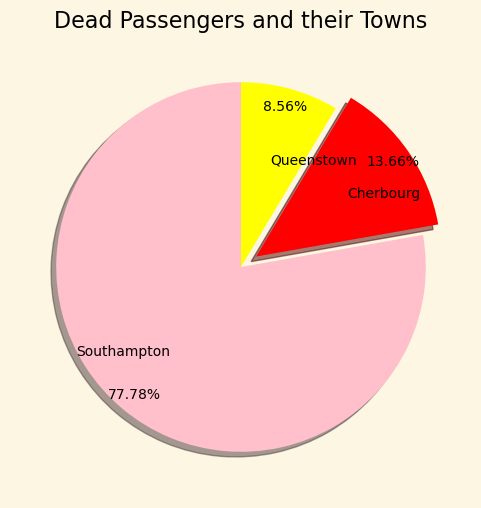

In [42]:
plt.figure(figsize=(6,6))
plt.title('Dead Passengers and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(dead['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['pink','red','yellow'],explode=explode,shadow=True,startangle=90,labeldistance=0.6, pctdistance=0.9)
plt.show()

In [43]:
survived['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

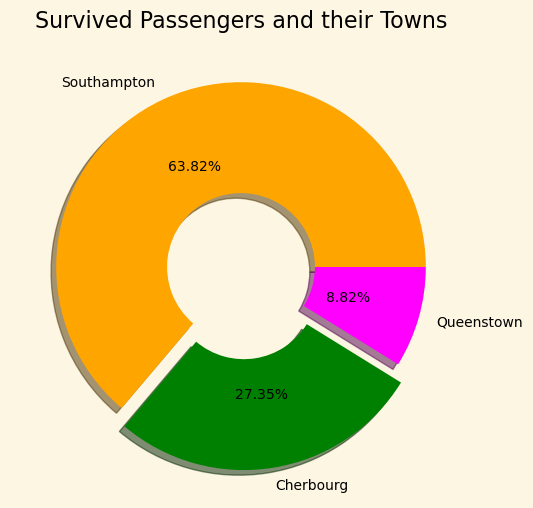

In [44]:
plt.figure(figsize=(6,6))
plt.title('Survived Passengers and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(survived['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['orange','green','magenta'],wedgeprops={'width':0.6}, explode=explode, shadow=True)
plt.show()

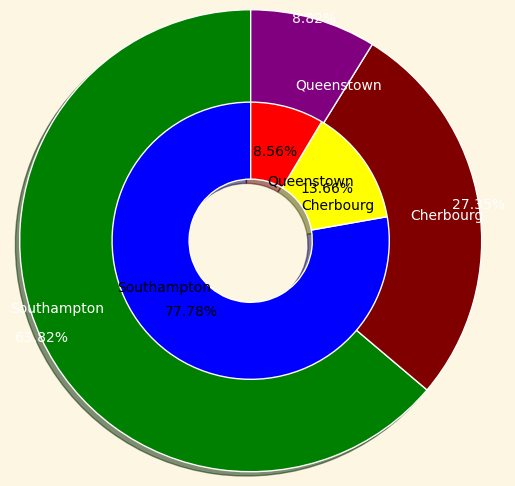

In [45]:
# Nested pie for survived and dead
#dead['Embarked'].value_counts()
#survived['Embarked'].value_counts()

plt.figure(figsize=(5,5))

#plt.subplots(figsize=(10,6), facecolor='purple')


plt.pie(dead['Embarked'].value_counts(), 
       radius=1, 
       colors=['blue','yellow','red'], 
       labels=['Southampton','Cherbourg','Queenstown'], 
       textprops={'color':'black'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        autopct ='%1.02f%%',
       #pctdistance=1.1,
        labeldistance=0.4,
        shadow=True)
plt.pie(survived['Embarked'].value_counts(), 
       radius=1.5, 
       colors=['green','maroon','purple'],
        textprops={'color':'white'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        labels=['Southampton','Cherbourg','Queenstown'], 
        shadow=True, labeldistance=0.7,autopct ='%1.02f%%',pctdistance=1)
#plt.tight_layout()
plt.show()

In [46]:
passengers.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeGrp  
0      0         A/5 21171   7.2500   NaN        S  Youth  
1      0          PC 17599  71.2833   C85        C  Youth  
2      0  STON/O2. 3101282   7.9250   NaN        S  Youth  
3      0            113803  53.1000  C123        S  Youth  
4      0            373450   8.0500   NaN        S  Youth

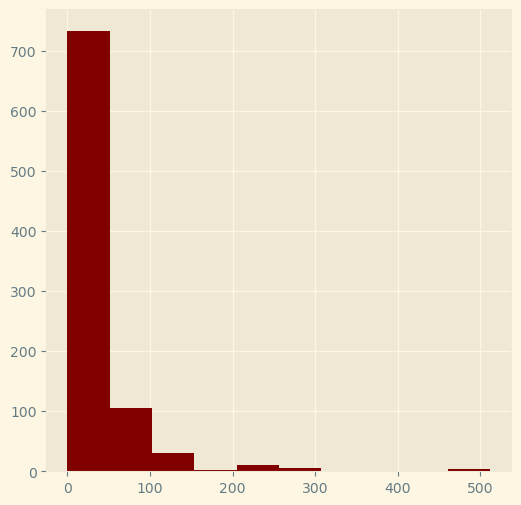

In [51]:
# Histogram for ticket fare
plt.figure(figsize=(6,6))
plt.hist(passengers['Fare'],color='maroon',)
plt.show()

In [48]:
passengers['Fare'].head(20)

0      7.2500
1     71.2833
2      7.9250
3     53.1000
4      8.0500
5      8.4583
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
15    16.0000
16    29.1250
17    13.0000
18    18.0000
19     7.2250
Name: Fare, dtype: float64

In [49]:
profile = ProfileReport(passengers)

In [50]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]